## Medical Model Checking
### Raymundo Gonzalez Leal

We consider the eczema medical trial data set again. This time we will compare which of 2 models explain the observed data best.

* Model 1: All studies have the same probability of success.
* Model 2: A hierarchical model where the probability of success in each study is drawn from a beta prior distribution with unknown $\alpha$ and $\beta$ parameters.


|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |


**Model 1:**

* For each group (treatment and control), all 6 studies have the same fixed, but unknown, probability of success, $\theta_t,\theta_c\in[0,1]$.
* The data follow a binomial distribution in each study, conditioned on the probability of success — $\theta_t$ for treatment or $\theta_c$ for control.
* The priors over $\theta_t$ and $\theta_c$ are uniform.

These assumptions lead to the following model.

* Likelihood: $\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i)$, where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients.

* Prior: $\text{Beta}(\theta\,|\,1,1)$ for both $\theta_t$ and $\theta_c$.

* Posterior for treatment group: $\text{Beta}(\theta_t\,|\,108, 35)$.

* Posterior for control group: $\text{Beta}(\theta_c\,|\,58, 65)$.

### Model Checking

Drawing posterior data samples:

We will sample lists of recoveries for the control group of every trial. Hence, each sample will be a list with 6 numbers (the recoveries in the control group for each study). Here, we will assume that the total amount of participants in the control group for each study was known (we will use the same numbers as in the real data). For each sample we will obtain a theta value from our posterior distribution, and generate the 6 numbers of recoveries using our theta value in all studies with their corresponding total number of participants.

In [124]:
#Let's fix the amount of patients per trial
N_control <- c(15,18,10,39,29,10)
n_samples = 1000

reps_control <- function(n){
    
    data_control_reps <- c()
    for (i in seq(n)){
        #theta sample
        theta_control_rep = rbeta(n=1, shape1 = 58, shape2 = 65)
        #recoveries sampl
        these_data_control_rep = rbinom(n=6, size = N_control, prob = theta_control_rep)
        data_control_reps  = cbind(data_control_reps, these_data_control_rep)   
    }
    
    data_control_reps
}

data_control_reps = reps_control(n_samples)

#### First test statistic

In [148]:
#Test statistic 1: the smallest percentage of recovery observed.

test1 <- function(data, N){
    min(data / N)  
}


In [126]:
test1_vals <- c()
for (i in seq(n_samples)){
   test1_vals = cbind(test1_vals,test1(data_control_reps[,i],N_control))
}


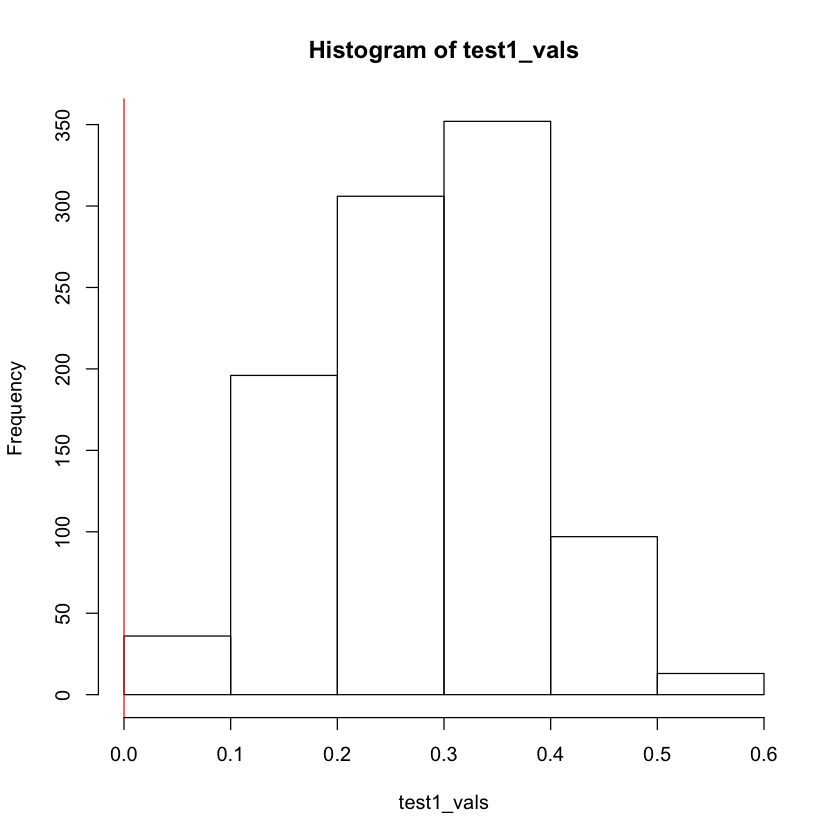

In [127]:
hist(test1_vals, breaks = 8)
abline(v=0,col="red")

In [128]:
test1_vals = sort(test1_vals)

In [129]:
i = 1
while(test1_vals[i]<= 0){
    i = i+1
    }

pval =  (i-1)/n_samples
pval

[1] 0.001

Our first test statistic is the minimum percentage of recoveries observed accross the 6 studies. In our real data, this minimum is 0% (observed in Silny 2006). Calculating our statistic for a 1000 samples we obtain a p-value of 0.001. Hence, our model does not predict well this statistic, and we would likely be able to discern real data from our generated data by looking at the minimum percantage of recoveries.

#### Second test statistic

In [141]:
real_var = var(c(9,11,4,21,12,0)/ N_control)

In [131]:
test2 <- function(data, N){
    var(data / N)  
}

In [132]:
test2_vals <- c()
for (i in seq(n_samples)){
   test2_vals = cbind(test2_vals,test2(data_control_reps[,i],N_control))
}

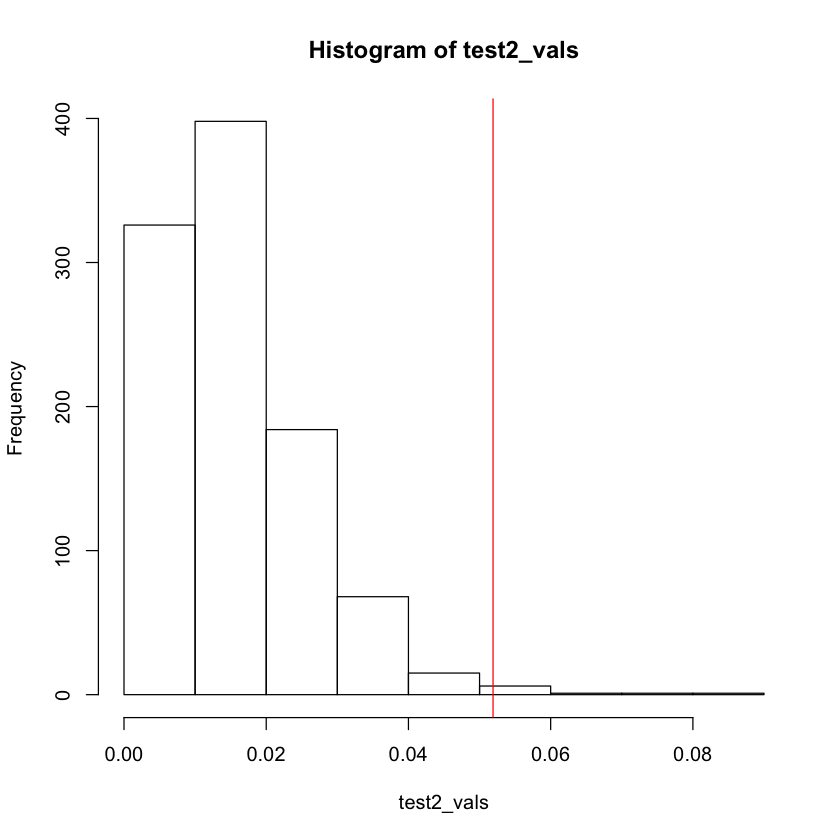

In [147]:
hist(test2_vals, breaks = 8)
abline(v= real_var,col="red")

In [136]:
test2_vals = sort(test2_vals)

In [143]:
i = 1
while(test2_vals[i]<= real_var){
    i = i+1
    }

pval =  (i-1)/n_samples
pval

[1] 0.993

Our second statistic is the variance in the percentage of recoveries across the 6 studies. Our histogram shows that our real data has a relatively high value for this statistic compared to our generated data. In fact, we obtain a p value of 0.993, which indicates that only 0.7% of our generated data had higher values for this statistic than the real data. This statistic is another aspect of the data that our model does not represent well.